# South African Language Identification 

South Africa is home to 11 official languages. With the use of  NLP's Language Identification, the aim of this challenge is to determine which piece of text represents which South African language.

## Import Packages

To perform various tasks, the following necessary dependencies were loaded:

In [239]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for Natural Language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Libraries for Data Preparation and Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Libraries for Model Evaluation
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

For this challenge, the South African Language Identification Hack 2022 dataset was downloaded from [Kaggle](https://www.kaggle.com/competitions/south-african-language-identification-hack-2022).

In [240]:
# Import training dataset
train = pd.read_csv("train_set.csv")

In [241]:
# Copy training dataset
train_copy = train.copy()

## Exploratory Data Analysis (EDA)

The EDA is the inital task in which we can investigate the dataframe's main characteristics.

In [117]:
# View the top 5 rows
test_copy.head()

,index,text
0,1,mmasepala fa maemo kgethegileng letlelela kgat...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [118]:
# View data type and non-null count
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


## Preprocessing

To ensure the dataframe is in the appropriate format before building models for prediction.

In [242]:
# converts labels into a numeric format
enc = LabelEncoder()
train_copy['lang_id'] = enc.fit_transform(train_copy['lang_id'])

In [243]:
# view top 5 rows
train_copy.head()

,lang_id,text
0,9,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,9,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,1,the province of kwazulu-natal department of tr...
3,3,o netefatša gore o ba file dilo ka moka tše le...
4,8,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<AxesSubplot:>

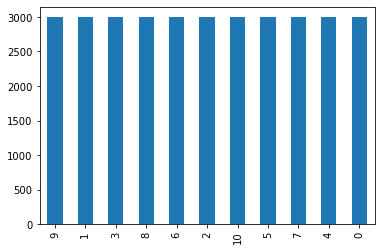

In [244]:
# Count and plot
x=train_copy['lang_id'].value_counts()
x.plot(kind='bar')

In [245]:
# Function sets lowercase and removes punctuations
def remove_punctuations(case):
    import string
    case = ''.join([i for i in case if i not in string.punctuation])
    
    user_output=case.lower().strip()
    return user_output

train_copy['text'] = train_copy['text'].apply(remove_punctuations)

In [246]:
# Function removes stopwords
stop_words = stopwords.words('english')

def cleaning_stopwords(text):
    return " ".join([i for i in str(text).split() if i not in stop_words])

train_copy['text']= train_copy['text'].apply(lambda text: cleaning_stopwords(text))

In [247]:
# Function creates tokens
def tokenize(words):
    tokeniser = TreebankWordTokenizer()
    
    return tokeniser.tokenize(words)
train_copy['text'] = train_copy['text'].apply(lambda text: cleaning_stopwords(text))

In [248]:
# Selection of X and y
X =train_copy['text']
y =train_copy['lang_id']

In [249]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [250]:
# Vectorization
vector = CountVectorizer(max_features=100000)
vector.fit(X_train)
X_train = vector.transform(X_train)
X_test = vector.transform(X_test)

In [251]:
print(X_train.shape)
print(X_test.shape)

(26400, 100000)
(6600, 100000)


## Model Building

#### Naive Bayes

In [238]:
m_nb = MultinomialNB(alpha=0.1)
m_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [222]:
m_nb_pred = m_nb.predict(X_test)

#### KNN

In [253]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier(n_neighbors=6,metric='minkowski', p=2,)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [254]:
KNN_model_pred = KNN_model.predict(X_test)

## Model Performance

In [224]:
print(classification_report(y_test, m_nb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       610
           1       0.08      0.99      0.16       562
           2       0.00      0.00      0.00       622
           3       0.00      0.00      0.00       603
           4       0.00      0.00      0.00       595
           5       0.00      0.00      0.00       623
           6       0.00      0.00      0.00       602
           7       0.00      0.00      0.00       566
           8       0.00      0.00      0.00       592
           9       0.00      0.00      0.00       598
          10       0.00      0.00      0.00       627

    accuracy                           0.08      6600
   macro avg       0.01      0.09      0.01      6600
weighted avg       0.01      0.08      0.01      6600



In [255]:
print(classification_report(y_test, KNN_model_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       610
           1       1.00      0.58      0.74       562
           2       0.86      0.54      0.66       622
           3       0.91      0.93      0.92       603
           4       0.98      0.94      0.96       595
           5       0.29      0.99      0.45       623
           6       0.92      0.90      0.91       602
           7       1.00      0.95      0.97       566
           8       1.00      0.93      0.96       592
           9       0.98      0.26      0.42       598
          10       0.95      0.23      0.37       627

    accuracy                           0.75      6600
   macro avg       0.90      0.75      0.76      6600
weighted avg       0.90      0.75      0.76      6600



## Apply model to test dataset

In [256]:
# import and copy test dataset
test = pd.read_csv("test_set.csv")
test_copy =test.copy()

In [257]:
test_copy['text'] = test_copy['text'].apply(remove_punctuations)

In [258]:
test_copy['text']= test_copy['text'].apply(lambda text: cleaning_stopwords(text))

In [259]:
test_vec=vector.transform(test_copy['text'])

In [260]:
m_nb_pred_test = m_nb.predict(test_vec)

#### Submission to Kaggle

In [261]:
output = test_copy[['index']]

In [262]:
output['lang_id'] = m_nb_pred_test

In [263]:
output['lang_id'] = enc.inverse_transform(output.lang_id)

In [265]:
output.to_csv('m_nb_01.csv', index = False)